# **Modelo World2 - Paso Temporal e Iteraciones**

## **Paso Temporal (\(dt\)) y Número de Iteraciones**

El modelo **World2**, basado en dinámica de sistemas, utiliza un **paso temporal (\(dt\))** para avanzar en la simulación. El valor predeterminado es:

- **Paso temporal (\(dt\))**: **0.2 años**

---

### **Notas Importantes**

1. **Definición del Paso Temporal (\(dt\))**:
   - Controla la resolución de la simulación.
   - Pasos más pequeños aumentan la precisión pero incrementan las iteraciones.

2. **Rango de Tiempo**:
   - Predeterminado: Desde **1900** hasta **2100**.
   - Configurable al crear la instancia del modelo.

3. **Operaciones por Iteración**:
   - Actualización de variables clave: población, recursos naturales, contaminación, calidad de vida, etc.
   - Evaluación de tasas y multiplicadores.
   - Avance al siguiente paso temporal.

4. **Flexibilidad**:
   - El paso temporal (\(dt\)) y el rango de años pueden ajustarse según las necesidades del análisis.

---

## **Variables del Modelo**

| **Variable** | **Nombre (Español)**                       | **Significado**                                                                                              |
|--------------|-------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| \(P\)        | Población                                 | Cantidad total de personas en el sistema.                                                                  |
| \(NR\)       | Recursos Naturales                        | Recursos no renovables disponibles en el sistema.                                                          |
| \(POL\)      | Contaminación                             | Acumulación de contaminación en el sistema.                                                                |
| \(CI\)       | Inversión de Capital                      | Capital acumulado, como infraestructura y tecnología.                                                      |
| \(CIAF\)     | Fracción del Capital en Agricultura       | Porcentaje del capital total asignado a la producción agrícola.                                            |
| \(QL\)       | Calidad de Vida                           | Indicador de satisfacción de la población.                                                                 |
| \(FR\)       | Relación de Alimentos                     | Proporción de alimentos disponibles en relación con la población total.                                    |
| \(NRFR\)     | Fracción de Recursos Naturales Restantes  | Porcentaje de los recursos iniciales que quedan en el sistema.                                             |
| \(POLR\)     | Relación de Contaminación                 | Relación entre la contaminación acumulada y un nivel de referencia definido.                               |
| \(BR\)       | Tasa de Nacimientos                       | Nacimientos por año.                                                                                       |
| \(DR\)       | Tasa de Muertes                           | Muertes por año.                                                                                           |
| \(CIR\)      | Relación Inversión de Capital             | Capital por persona.                                                                                       |
| \(CIG\)      | Generación de Inversión de Capital        | Capital generado por año.                                                                                  |
| \(CID\)      | Descarte de Inversión de Capital          | Capital perdido o descartado por año.                                                                      |
| \(MSL\)      | Nivel Material de Vida                   | Nivel de vida material disponible.                                                                         |

---


In [ ]:
!git clone https://github.com/carlosvasquez3/pyworld2.git

Cloning into 'pyworld2'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 100 (delta 47), reused 69 (delta 34), pack-reused 0 (from 0)
Receiving objects: 100% (100/100), 323.41 KiB | 1.27 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [ ]:
%cd pyworld2

/content/pyworld2


In [ ]:
#Importar las librerías, modelos y funciones
import os
from pyworld2.world2 import World2
from pyworld2.utils import plot_world_variables
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from pyworld2 import World2
import matplotlib.pyplot as plt
from pyworld2.utils import plot_world_variables
import pandas as pd

[<Axes: xlabel='time [years]', ylabel='P'>,
 <Axes: ylabel='POLR'>,
 <Axes: ylabel='CI'>,
 <Axes: ylabel='QL'>,
 <Axes: ylabel='NR'>]

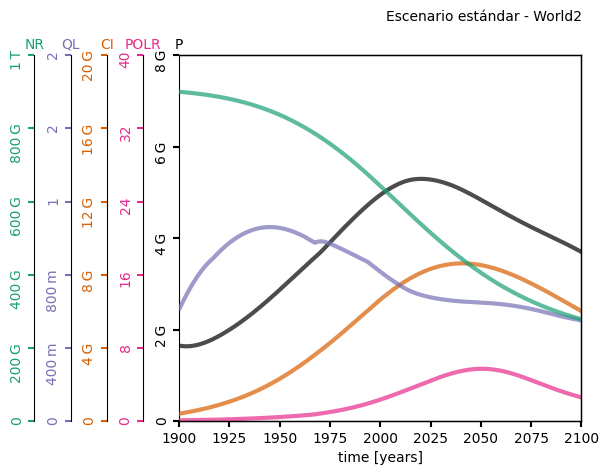

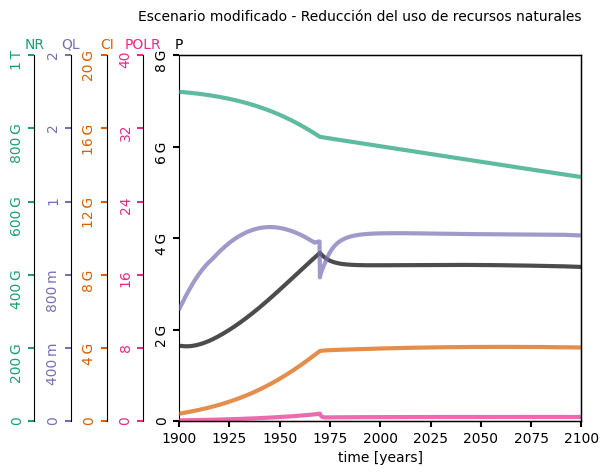

In [ ]:
# Crear y ejecutar el escenario estándar
w2_std = World2()
w2_std.set_state_variables()
w2_std.set_initial_state()
w2_std.set_table_functions()
w2_std.set_switch_functions()  # Usando el archivo functions_switch_default.json
w2_std.run()

# Crear y ejecutar el escenario modificado (reducción del uso de recursos naturales)
w2_mod = World2()
w2_mod.set_state_variables()
w2_mod.set_initial_state()
w2_mod.set_table_functions()

# Modificar las políticas con un archivo de configuración diferente
scenario_file = "./examples/scenarios/functions_switch_scenario_10.json"
if os.path.exists(scenario_file):
    w2_mod.set_switch_functions(scenario_file)
else:
    print("El archivo del escenario modificado no se encuentra. Usando configuración predeterminada.")

w2_mod.run()

# Graficar el escenario estándar
plot_world_variables(
    w2_std.time,
    [w2_std.p, w2_std.polr, w2_std.ci, w2_std.ql, w2_std.nr],
    ["P", "POLR", "CI","QL", "NR"],
    [[0, 8e9], [0, 40], [0, 20e9], [0, 2], [0, 1000e9]],
    title="Escenario estándar - World2"
)

# Graficar el escenario modificado
plot_world_variables(
    w2_mod.time,
    [w2_mod.p, w2_mod.polr, w2_mod.ci, w2_mod.ql, w2_mod.nr],
    ["P", "POLR", "CI","QL", "NR"],
    [[0, 8e9], [0, 40], [0, 20e9], [0, 2], [0, 1000e9]],
    title="Escenario modificado - Reducción del uso de recursos naturales"
)


In [ ]:
# Obtener y mostrar los valores finales
for scenario, model in [("Escenario Estándar", w2_std), ("Escenario Modificado", w2_mod)]:
    print(f"\nResultados finales - {scenario}:")
    print(f"Población (P): {model.p[-1]:.2f}")
    print(f"Relación de contaminación (POLR): {model.polr[-1]:.2f}")
    print(f"Inversión de capital (CI): {model.ci[-1]:.2f}")
    print(f"Calidad de vida (QL): {model.ql[-1]:.2f}")
    print(f"Recursos naturales (NR): {model.nr[-1]:.2f}")

    # Resultados de los parámetros adicionales
    try:
        print(f"Tasa de uso de recursos naturales (NRUN): {model.nrun(model.time[-1]):.2f}")
        print(f"Contaminación por persona (Pollutionpercap): {model.poln(model.time[-1]):.2f}")
        print(f"Relación de inversión de capital (Capinvrat): {model.cir[-1]:.2f}")
        print(f"Coeficiente de alimentación (Foodcoeff): {model.fc(model.time[-1]):.2f}")
        print(f"Tasa normal de nacimientos (Birthratenormal): {model.brn(model.time[-1]):.2f}")
    except AttributeError as e:
        print(f"Parámetro no encontrado en el modelo: {e}")



Resultados finales - Escenario Estándar:
Población (P): 3699743303.72
Relación de contaminación (POLR): 2.59
Inversión de capital (CI): 6010240430.13
Calidad de vida (QL): 0.55
Recursos naturales (NR): 278240023740.90
Tasa de uso de recursos naturales (NRUN): 1.00
Contaminación por persona (Pollutionpercap): 1.00
Relación de inversión de capital (Capinvrat): 1.62
Coeficiente de alimentación (Foodcoeff): 1.00
Tasa normal de nacimientos (Birthratenormal): 0.04

Resultados finales - Escenario Modificado:
Población (P): 8611964221.33
Relación de contaminación (POLR): 0.74
Inversión de capital (CI): 21599601259.81
Calidad de vida (QL): 0.72
Recursos naturales (NR): 776807433608.70
Tasa de uso de recursos naturales (NRUN): 0.00
Contaminación por persona (Pollutionpercap): 0.10
Relación de inversión de capital (Capinvrat): 2.51
Coeficiente de alimentación (Foodcoeff): 1.00
Tasa normal de nacimientos (Birthratenormal): 0.04


In [ ]:
# Función para crear DataFrame a partir de los resultados del modelo
def crear_dataframe_completo(modelo, nombre):
    try:
        return pd.DataFrame({
            "Año": modelo.time,
            "Población (P)": modelo.p,
            "Relación de contaminación (POLR)": modelo.polr,
            "Inversión de capital (CI)": modelo.ci,
            "Calidad de vida (QL)": modelo.ql,
            "Recursos naturales (NR)": modelo.nr,
            "Tasa de uso de recursos naturales (NRUN)": [modelo.nrun(t) for t in modelo.time],
            "Contaminación por persona (Pollutionpercap)": [modelo.poln(t) for t in modelo.time],
            "Relación de inversión de capital (Capinvrat)": modelo.cir,
            "Coeficiente de alimentación (Foodcoeff)": [modelo.fc(t) for t in modelo.time],
            "Tasa normal de nacimientos (Birthratenormal)": [modelo.brn(t) for t in modelo.time]
        }, index=[f"{nombre}_{i}" for i in range(len(modelo.time))])
    except AttributeError as e:
        print(f"Error al procesar parámetros adicionales: {e}")
        return pd.DataFrame()  # Retornar DataFrame vacío en caso de error

# Crear DataFrames para ambos escenarios
df_estandar = crear_dataframe_completo(w2_std, "Estándar")
df_modificado = crear_dataframe_completo(w2_mod, "Modificado")

In [ ]:
# Mostrar los primeros registros
print("Escenario estándar:")
df_estandar.head(1001)

Escenario estándar:


,Año,Población (P),Relación de contaminación (POLR),Inversión de capital (CI),Calidad de vida (QL),Recursos naturales (NR),Tasa de uso de recursos naturales (NRUN),Contaminación por persona (Pollutionpercap),Relación de inversión de capital (Capinvrat),Coeficiente de alimentación (Foodcoeff),Tasa normal de nacimientos (Birthratenormal)
Estándar_0,1900.0,1.650000e+09,0.055556,4.000000e+08,NaN,9.000000e+11,1,1,0.242424,1,0.04
Estándar_1,1900.2,1.648231e+09,0.063052,4.037643e+08,0.616037,8.999086e+11,1,1,0.244968,1,0.04
Estándar_2,1900.4,1.646567e+09,0.068334,4.075447e+08,0.620497,8.998163e+11,1,1,0.247512,1,0.04
Estándar_3,1900.6,1.645011e+09,0.072122,4.113414e+08,0.624963,8.997233e+11,1,1,0.250054,1,0.04
Estándar_4,1900.8,1.643564e+09,0.074897,4.151546e+08,0.629426,8.996294e+11,1,1,0.252594,1,0.04
...,...,...,...,...,...,...,...,...,...,...,...
Estándar_996,2099.2,3.718301e+09,2.635135,6.060418e+09,0.551135,2.794802e+11,1,1,1.629889,1,0.04
Estándar_997,2099.4,3.713664e+09,2.623121,6.047869e+09,0.550701,2.791683e+11,1,1,1.628545,1,0.04
Estándar_998,2099.6,3.709025e+09,2.611163,6.035324e+09,0.550268,2.788577e+11,1,1,1.627200,1,0.04
Estándar_999,2099.8,3.704385e+09,2.599261,6.022780e+09,0.549836,2.785482e+11,1,1,1.625852,1,0.04


In [ ]:
# Mostrar los primeros registros
print("\nEscenario modificado:")
df_modificado.head(1001)


Escenario modificado:


,Año,Población (P),Relación de contaminación (POLR),Inversión de capital (CI),Calidad de vida (QL),Recursos naturales (NR),Tasa de uso de recursos naturales (NRUN),Contaminación por persona (Pollutionpercap),Relación de inversión de capital (Capinvrat),Coeficiente de alimentación (Foodcoeff),Tasa normal de nacimientos (Birthratenormal)
Modificado_0,1900.0,1.650000e+09,0.055556,4.000000e+08,NaN,9.000000e+11,1.00,1.0,0.242424,1.0,0.040
Modificado_1,1900.2,1.648231e+09,0.063052,4.037643e+08,0.616037,8.999086e+11,1.00,1.0,0.244968,1.0,0.040
Modificado_2,1900.4,1.646567e+09,0.068334,4.075447e+08,0.620497,8.998163e+11,1.00,1.0,0.247512,1.0,0.040
Modificado_3,1900.6,1.645011e+09,0.072122,4.113414e+08,0.624963,8.997233e+11,1.00,1.0,0.250054,1.0,0.040
Modificado_4,1900.8,1.643564e+09,0.074897,4.151546e+08,0.629426,8.996294e+11,1.00,1.0,0.252594,1.0,0.040
...,...,...,...,...,...,...,...,...,...,...,...
Modificado_996,2099.2,3.370871e+09,0.443998,4.020153e+09,1.014829,6.675850e+11,0.25,0.5,1.192615,0.8,0.028
Modificado_997,2099.4,3.370507e+09,0.443949,4.019735e+09,1.014768,6.674215e+11,0.25,0.5,1.192620,0.8,0.028
Modificado_998,2099.6,3.370140e+09,0.443899,4.019313e+09,1.014708,6.672580e+11,0.25,0.5,1.192625,0.8,0.028
Modificado_999,2099.8,3.369771e+09,0.443849,4.018887e+09,1.014650,6.670946e+11,0.25,0.5,1.192629,0.8,0.028


# **World2 Optimización_Analytical**


In [ ]:
# Función para configurar el modelo World2 con parámetros ajustados
def simulate_world2(params, year_min, year_max, dt):
    """
    Configura el modelo World2 con los parámetros ajustados y ejecuta la simulación.
    """
    # Crear instancia del modelo
    model = World2(year_min=year_min, year_max=year_max, dt=dt)

    # Configurar el modelo con los parámetros ajustados
    model.set_state_variables(
        fn=params[3],     # Coeficiente de alimentos
        pols=params[1]    # Relación de contaminación por persona
    )
    model.set_initial_state(
        nri=params[0] * 900e9,  # Tasa de uso de recursos naturales (relativo al valor base)
        ciafi=params[2],        # Tasa de inversión de capital
        pi=1.65e9,              # Población inicial
        poli=params[1] * 0.2e9, # Contaminación inicial
        cii=params[2] * 0.4e9   # Inversión de capital inicial
    )
    model.set_table_functions()
    model.set_switch_functions()  # Usa el archivo predeterminado para simplificar
    model.run()

    # Calcular el promedio de las variables objetivo
    avg_population = np.mean(model.p)
    avg_quality_of_life = np.mean(model.ql)
    avg_pollution_ratio = np.mean(model.polr)
    avg_natural_resources = np.mean(model.nr)
    avg_capital_investment = np.mean(model.ci)

    # Retornar la suma promedio de todas las variables (negativo para maximizar)
    return -np.mean([
        avg_quality_of_life
    ])

In [ ]:
# Función para configurar el modelo World2 con parámetros ajustados
def simulate_world2(params, year_min, year_max, dt):
    """
    Configura el modelo World2 con los parámetros ajustados y ejecuta la simulación.
    """
    # Crear instancia del modelo
    model = World2(year_min=year_min, year_max=year_max, dt=dt)

    # Configurar el modelo con los parámetros ajustados
    model.set_state_variables(
        fn=params[3],     # Coeficiente de alimentos
        pols=params[1]    # Relación de contaminación por persona
    )
    model.set_initial_state(
        nri=params[0] * 900e9,  # Tasa de uso de recursos naturales (relativo al valor base)
        ciafi=params[2],        # Tasa de inversión de capital
        pi=1.65e9,              # Población inicial
        poli=params[1] * 0.2e9, # Contaminación inicial
        cii=params[2] * 0.4e9   # Inversión de capital inicial
    )
    model.set_table_functions()
    model.set_switch_functions()  # Usa el archivo predeterminado para simplificar
    model.run()

    # Retornar el valor final de la calidad de vida (QL) como función objetivo
    return -model.ql[-1]  # Negativo porque se busca maximizar

# Configuración inicial para la optimización
parametros_iniciales = [0.25, 0.5, 0.03, 0.8, 0.04]  # Valores iniciales de los parámetros
limites_parametros = [
    (0.1, 1.0),   # NRUN1970
    (0.1, 1.0),   # Pollutionpercap1970
    (0.01, 0.05), # Capinvrate1970
    (0.6, 1.25),  # Foodcoeff1970
    (0.02, 0.04)  # Birthratenormal1970
]

# Parámetros de simulación
year_min, year_max = 1900, 2100
dt = 0.2  # Paso temporal

# Función objetivo para minimizar
def objective(params):
    return simulate_world2(params, year_min, year_max, dt)

# Optimización
result = minimize(
    objective,
    parametros_iniciales,
    bounds=limites_parametros
)

# Resultados
parametros_optimos = result.x
print("Parámetros óptimos:")
print(f"NRUN1970: {parametros_optimos[0]:.5f}")
print(f"Pollutionpercap1970: {parametros_optimos[1]:.5f}")
print(f"Capinvrate1970: {parametros_optimos[2]:.5f}")
print(f"Foodcoeff1970: {parametros_optimos[3]:.5f}")
print(f"Birthratenormal1970: {parametros_optimos[4]:.5f}")
print("\nResultado de la función objetivo (promedio de las variables):")
print(f"{-result.fun:.5f}")

# Mostrar información del optimizador
print("\nInformación del optimizador:")
print(result)

Parámetros óptimos:
NRUN1970: 0.25000
Pollutionpercap1970: 0.50000
Capinvrate1970: 0.03000
Foodcoeff1970: 0.79337
Birthratenormal1970: 0.04000

Resultado de la función objetivo (promedio de las variables):
nan

Información del optimizador:
  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: nan
        x: [ 2.500e-01  5.000e-01  3.000e-02  7.934e-01  4.000e-02]
      nit: 1
      jac: [ 0.000e+00  0.000e+00  0.000e+00  6.741e-03 -0.000e+00]
     nfev: 36
     njev: 6
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>


In [ ]:
parametros_iniciales = [0.25, 0.5, 0.03, 0.8, 0.04]

In [ ]:
simulate_world2(parametros_iniciales, 1900, 2100, 0.2)

-0.005304000000000001

**jac:** Gradiente de la función objetivo respecto a los parámetros. Los valores indican la dirección y magnitud de cambio necesaria en cada parámetro para mejorar la solución.


Resultados finales del modelo:
Población (P): 2627230395.03
Relación de contaminación (POLR): 0.64
Inversión de capital (CI): 1528968300.59
Calidad de vida (QL): 0.36
Recursos naturales (NR): 44881014746.50
Tasa de uso de recursos naturales (NRUN): 1.00
Contaminación por persona (Pollutionpercap): 1.00
Relación de inversión de capital (Capinvrat): 0.58
Coeficiente de alimentación (Foodcoeff): 1.00
Tasa normal de nacimientos (Birthratenormal): 0.04


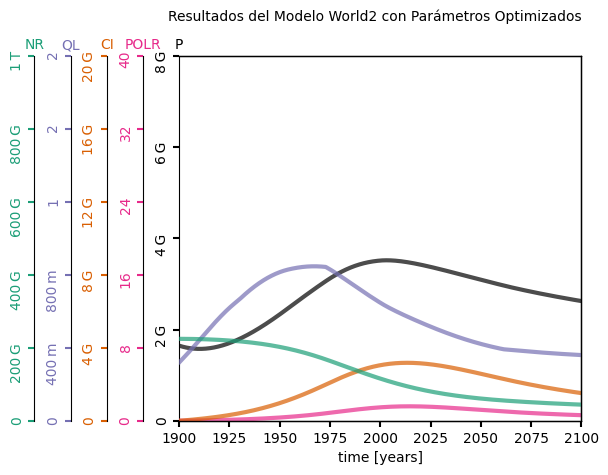

In [ ]:
# Función para configurar y ejecutar el modelo World2 con parámetros optimizados
def run_world2_with_params(opt_params):
    # Crear instancia del modelo
    year_min, year_max, dt = 1900, 2100, 0.2
    model = World2(year_min=year_min, year_max=year_max, dt=dt)

    # Configurar los parámetros optimizados
    model.set_state_variables(
        fn=opt_params[3],  # Coeficiente de alimentos
        pols=opt_params[1] * 3.6e9  # Relación de contaminación estándar
    )
    model.set_initial_state(
        nri=opt_params[0] * 900e9,   # Recursos naturales iniciales
        ciafi=opt_params[2],         # Fracción de inversión de capital
        poli=opt_params[1] * 0.2e9,  # Contaminación inicial
        cii=opt_params[2] * 0.4e9    # Inversión de capital inicial
    )
    model.set_table_functions()
    model.set_switch_functions()  # Usar configuraciones predeterminadas
    model.run()

    return model

# Función para mostrar resultados finales
def display_final_results(model):
    print("\nResultados finales del modelo:")
    print(f"Población (P): {model.p[-1]:.2f}")
    print(f"Relación de contaminación (POLR): {model.polr[-1]:.2f}")
    print(f"Inversión de capital (CI): {model.ci[-1]:.2f}")
    print(f"Calidad de vida (QL): {model.ql[-1]:.2f}")
    print(f"Recursos naturales (NR): {model.nr[-1]:.2f}")

    # Resultados de parámetros adicionales
    try:
        print(f"Tasa de uso de recursos naturales (NRUN): {model.nrun(model.time[-1]):.2f}")
        print(f"Contaminación por persona (Pollutionpercap): {model.poln(model.time[-1]):.2f}")
        print(f"Relación de inversión de capital (Capinvrat): {model.cir[-1]:.2f}")
        print(f"Coeficiente de alimentación (Foodcoeff): {model.fc(model.time[-1]):.2f}")
        print(f"Tasa normal de nacimientos (Birthratenormal): {model.brn(model.time[-1]):.2f}")
    except AttributeError as e:
        print(f"Parámetro no encontrado en el modelo: {e}")

# Gráfica de los resultados
def plot_results(model):
    plot_world_variables(
        model.time,
        [model.p, model.polr, model.ci, model.ql, model.nr],
        ["P", "POLR", "CI", "QL", "NR"],
        [[0, 8e9], [0, 40], [0, 20e9], [0, 2], [0, 1000e9]],
        title="Resultados del Modelo World2 con Parámetros Optimizados"
    )
    plt.show()

# Parámetros optimizados
parametros_optimos = [0.25, 0.5, 0.03, 0.8, 0.04]

# Ejecutar el modelo
modelo_optimizado = run_world2_with_params(parametros_optimos)

# Mostrar resultados finales
display_final_results(modelo_optimizado)

# Graficar los resultados
plot_results(modelo_optimizado)


In [ ]:
# Función para crear un DataFrame con los resultados del modelo a lo largo del tiempo
def crear_dataframe_resultados(model, scenario_name):
    data = {
        "Año": model.time,
        "Población (P)": model.p,
        "Relación de contaminación (POLR)": model.polr,
        "Inversión de capital (CI)": model.ci,
        "Calidad de vida (QL)": model.ql,
        "Recursos naturales (NR)": model.nr,
        "Tasa de uso de recursos naturales (NRUN)": [model.nrun(t) for t in model.time],
        "Contaminación por persona (Pollutionpercap)": [model.poln(t) for t in model.time],
        "Relación de inversión de capital (Capinvrat)": model.cir,
        "Coeficiente de alimentación (Foodcoeff)": [model.fc(t) for t in model.time],
        "Tasa normal de nacimientos (Birthratenormal)": [model.brn(t) for t in model.time]
    }
    df = pd.DataFrame(data)
    df.index = [f"{scenario_name}_{i}" for i in range(len(df))]
    return df

# Crear y mostrar el DataFrame con los resultados
scenario_name = "Modificado"  # Nombre del escenario para identificar las filas
df_resultados = crear_dataframe_resultados(modelo_optimizado, scenario_name)

# Mostrar los primeros registros del DataFrame
df_resultados.head(1001)

# Guardar en un archivo CSV si es necesario
# df_resultados.to_csv("resultados_modelo.csv", index=True)

,Año,Población (P),Relación de contaminación (POLR),Inversión de capital (CI),Calidad de vida (QL),Recursos naturales (NR),Tasa de uso de recursos naturales (NRUN),Contaminación por persona (Pollutionpercap),Relación de inversión de capital (Capinvrat),Coeficiente de alimentación (Foodcoeff),Tasa normal de nacimientos (Birthratenormal)
Modificado_0,1900.0,1.650000e+09,0.055556,1.200000e+07,NaN,2.250000e+11,1,1,0.007273,1,0.04
Modificado_1,1900.2,1.647151e+09,0.047791,1.373966e+07,0.322832,2.249967e+11,1,1,0.008341,1,0.04
Modificado_2,1900.4,1.644375e+09,0.042699,1.548907e+07,0.325155,2.249929e+11,1,1,0.009419,1,0.04
Modificado_3,1900.6,1.641669e+09,0.039426,1.724830e+07,0.327469,2.249886e+11,1,1,0.010507,1,0.04
Modificado_4,1900.8,1.639029e+09,0.037387,1.901739e+07,0.329779,2.249839e+11,1,1,0.011603,1,0.04
...,...,...,...,...,...,...,...,...,...,...,...
Modificado_996,2099.2,2.633162e+09,0.646314,1.541455e+09,0.361506,4.505268e+10,1,1,0.585401,1,0.04
Modificado_997,2099.4,2.631676e+09,0.644815,1.538321e+09,0.361386,4.500957e+10,1,1,0.584540,1,0.04
Modificado_998,2099.6,2.630192e+09,0.643322,1.535195e+09,0.361267,4.496659e+10,1,1,0.583682,1,0.04
Modificado_999,2099.8,2.628710e+09,0.641834,1.532077e+09,0.361148,4.492374e+10,1,1,0.582825,1,0.04


# **Sin el promedio**

In [ ]:
# Función para configurar y ejecutar el modelo World2 con los parámetros ajustados
def simulate_world2(params, year_min, year_max, dt):
    # Crear instancia del modelo
    model = World2(year_min=year_min, year_max=year_max, dt=dt)

    # Configurar el modelo con los parámetros ajustados
    model.set_state_variables(
        fn=params[3],                  # Foodcoeff1970 (Coeficiente de alimentos)
        pols=params[1] * 3.6e9         # Pollutionpercap1970 (Estándar de contaminación)
    )
    model.set_initial_state(
        nri=params[0] * 900e9,         # NRUN1970 (Recursos naturales iniciales)
        cii=params[2] * 0.4e9,         # Capinvrate1970 (Inversión de capital inicial)
        ciafi=0.2,                     # Fracción inicial de capital en agricultura
        pi=1.65e9,                     # Población inicial
        poli=params[1] * 0.2e9         # Contaminación inicial
    )
    model.set_table_functions()
    model.set_switch_functions()

    # Ajustar parámetros de tasa de natalidad normal
    model.brn.value_before_switch = params[4]  # Birthratenormal1970

    # Ejecutar la simulación
    model.run()

    # Calcular la variable objetivo (por ejemplo, la calidad de vida final)
    objective_value = model.ql[-1]

    # Retornar el negativo si quieres maximizar (porque minimize minimiza)
    return -objective_value

# Configuración inicial para la optimización
parametros_iniciales = [0.25, 0.5, 0.03, 0.8, 0.03]  # [NRUN1970, Pollutionpercap1970, Capinvrate1970, Foodcoeff1970, Birthratenormal1970]

# Definir límites para cada parámetro
limites_parametros = [
    (0.1, 1.0),    # NRUN1970
    (0.1, 1.0),    # Pollutionpercap1970
    (0.01, 0.05),  # Capinvrate1970
    (0.6, 1.25),   # Foodcoeff1970
    (0.02, 0.04)   # Birthratenormal1970
]

# Parámetros de simulación
year_min, year_max = 1900, 2100
dt = 0.2

# Función objetivo para minimizar
def objective(params):
    return simulate_world2(params, year_min, year_max, dt)

# Optimización
result = minimize(
    objective,
    parametros_iniciales,
    bounds=limites_parametros
)

# Parámetros óptimos encontrados
parametros_optimos = result.x

# Mostrar resultados
print("Parámetros óptimos encontrados:")
print(f"NRUN1970: {parametros_optimos[0]:.5f}")
print(f"Pollutionpercap1970: {parametros_optimos[1]:.5f}")
print(f"Capinvrate1970: {parametros_optimos[2]:.5f}")
print(f"Foodcoeff1970: {parametros_optimos[3]:.5f}")
print(f"Birthratenormal1970: {parametros_optimos[4]:.5f}")
print("\nValor de la función objetivo:")
print(f"{-result.fun:.5f}")

# Información adicional del optimizador
print("\nInformación del optimizador:")
print(f"Éxito: {result.success}")
print(f"Mensaje: {result.message}")

# Mostrar información del optimizador
print("\nInformación del optimizador:")
print(result)

Parámetros óptimos encontrados:
NRUN1970: 0.63180
Pollutionpercap1970: 0.38622
Capinvrate1970: 0.01000
Foodcoeff1970: 1.25000
Birthratenormal1970: 0.02000

Valor de la función objetivo:
14.90927

Información del optimizador:
Éxito: True
Mensaje: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH

Información del optimizador:
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -14.909265702646051
        x: [ 6.318e-01  3.862e-01  1.000e-02  1.250e+00  2.000e-02]
      nit: 30
      jac: [-6.688e-01  2.991e+00  6.340e+00 -1.870e+00  1.994e+01]
     nfev: 1026
     njev: 171
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>


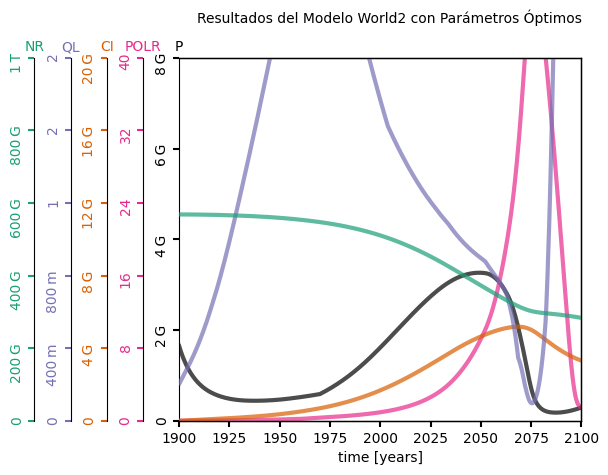

Resultados finales con parámetros óptimos:
Población (P): 296608428.30
Relación de contaminación (POLR): 1.54
Inversión de capital (CI): 3326885139.35
Calidad de vida (QL): 14.91
Recursos naturales (NR): 283996626949.31

Parámetros óptimos utilizados:
NRUN1970 (Uso de recursos naturales): 0.63180
Pollutionpercap1970 (Contaminación por persona): 0.38622
Capinvrate1970 (Tasa de inversión de capital): 0.01000
Foodcoeff1970 (Coeficiente de alimentos): 1.25000
Birthratenormal1970 (Tasa normal de nacimientos): 0.02000


In [ ]:
# Ejecutar el modelo con los parámetros óptimos
def run_world2_with_optimal_params(opt_params):
    model = World2(year_min=year_min, year_max=year_max, dt=dt)

    # Configurar el modelo con los parámetros óptimos
    model.set_state_variables(
        fn=opt_params[3],
        pols=opt_params[1] * 3.6e9
    )
    model.set_initial_state(
        nri=opt_params[0] * 900e9,
        cii=opt_params[2] * 0.4e9,
        ciafi=0.2,
        pi=1.65e9,
        poli=opt_params[1] * 0.2e9
    )
    model.set_table_functions()
    model.set_switch_functions()
    model.brn.value_before_switch = opt_params[4]
    model.run()
    return model

# Obtener el modelo con los parámetros óptimos
model_opt = run_world2_with_optimal_params(parametros_optimos)

# Graficar las variables clave
plot_world_variables(
    model_opt.time,
    [model_opt.p, model_opt.polr, model_opt.ci, model_opt.ql, model_opt.nr],
    ["P", "POLR", "CI", "QL", "NR"],
    [[0, 8e9], [0, 40], [0, 20e9], [0, 2], [0, 1000e9]],
    title="Resultados del Modelo World2 con Parámetros Óptimos"
)
plt.show()

# Mostrar resultados finales
print("Resultados finales con parámetros óptimos:")
print(f"Población (P): {model_opt.p[-1]:.2f}")
print(f"Relación de contaminación (POLR): {model_opt.polr[-1]:.2f}")
print(f"Inversión de capital (CI): {model_opt.ci[-1]:.2f}")
print(f"Calidad de vida (QL): {model_opt.ql[-1]:.2f}")
print(f"Recursos naturales (NR): {model_opt.nr[-1]:.2f}")

# Mostrar los parámetros óptimos utilizados
print("\nParámetros óptimos utilizados:")
print(f"NRUN1970 (Uso de recursos naturales): {parametros_optimos[0]:.5f}")
print(f"Pollutionpercap1970 (Contaminación por persona): {parametros_optimos[1]:.5f}")
print(f"Capinvrate1970 (Tasa de inversión de capital): {parametros_optimos[2]:.5f}")
print(f"Foodcoeff1970 (Coeficiente de alimentos): {parametros_optimos[3]:.5f}")
print(f"Birthratenormal1970 (Tasa normal de nacimientos): {parametros_optimos[4]:.5f}")

In [ ]:
# Función para crear un DataFrame con los resultados del modelo a lo largo del tiempo
def crear_dataframe_resultados(model, scenario_name):
    data = {
        "Año": model.time,
        "Población (P)": model.p,
        "Relación de contaminación (POLR)": model.polr,
        "Inversión de capital (CI)": model.ci,
        "Calidad de vida (QL)": model.ql,
        "Recursos naturales (NR)": model.nr,
        "Tasa de uso de recursos naturales (NRUN)": [model.nrun(t) for t in model.time],
        "Contaminación por persona (Pollutionpercap)": [model.poln(t) for t in model.time],
        "Relación de inversión de capital (Capinvrat)": model.cir,
        "Coeficiente de alimentación (Foodcoeff)": [model.fc(t) for t in model.time],
        "Tasa normal de nacimientos (Birthratenormal)": [model.brn(t) for t in model.time]
    }
    df = pd.DataFrame(data)
    df.index = [f"{scenario_name}_{i}" for i in range(len(df))]
    return df

# Crear el DataFrame con los resultados del modelo optimizado
scenario_name = "Escenario Optimizado"  # Nombre del escenario para identificar las filas
df_resultados_optimizado = crear_dataframe_resultados(model_opt, scenario_name)

# Mostrar los primeros registros del DataFrame
df_resultados_optimizado.head(1001)

# Guardar en un archivo CSV si es necesario
# df_resultados_optimizado.to_csv("resultados_modelo_optimizado.csv", index=True)

,Año,Población (P),Relación de contaminación (POLR),Inversión de capital (CI),Calidad de vida (QL),Recursos naturales (NR),Tasa de uso de recursos naturales (NRUN),Contaminación por persona (Pollutionpercap),Relación de inversión de capital (Capinvrat),Coeficiente de alimentación (Foodcoeff),Tasa normal de nacimientos (Birthratenormal)
Escenario Optimizado_0,1900.0,1.650000e+09,0.055556,4.000000e+06,NaN,5.686197e+11,1,1,0.002424,1,0.02
Escenario Optimizado_1,1900.2,1.620211e+09,0.049771,5.671143e+06,0.208156,5.686188e+11,1,1,0.003500,1,0.02
Escenario Optimizado_2,1900.4,1.591382e+09,0.045866,7.321179e+06,0.212437,5.686175e+11,1,1,0.004601,1,0.02
Escenario Optimizado_3,1900.6,1.563467e+09,0.043242,8.950874e+06,0.216694,5.686159e+11,1,1,0.005725,1,0.02
Escenario Optimizado_4,1900.8,1.536424e+09,0.041491,1.056096e+07,0.220932,5.686138e+11,1,1,0.006874,1,0.02
...,...,...,...,...,...,...,...,...,...,...,...
Escenario Optimizado_996,2099.2,2.844922e+08,1.613927,3.359143e+09,14.926327,2.847692e+11,1,1,11.807507,1,0.04
Escenario Optimizado_997,2099.4,2.874724e+08,1.585286,3.350882e+09,14.925153,2.845780e+11,1,1,11.656364,1,0.04
Escenario Optimizado_998,2099.6,2.904852e+08,1.564282,3.342752e+09,14.921724,2.843855e+11,1,1,11.507480,1,0.04
Escenario Optimizado_999,2099.8,2.935305e+08,1.549861,3.334753e+09,14.916341,2.841917e+11,1,1,11.360839,1,0.04


#**Word2**

In [ ]:
!git clone https://github.com/carlosvasquez3/pyworld2.git

Cloning into 'pyworld2'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 100 (delta 47), reused 69 (delta 34), pack-reused 0 (from 0)
Receiving objects: 100% (100/100), 323.41 KiB | 1.19 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [ ]:
%cd pyworld2

/content/pyworld2


Resultados Finales:
Población (P): 4.24e+09
Relación de contaminación (POLR): 4.25e+00
Inversión de capital (CI): 7.56e+09
Calidad de vida (QL): 7.20e-01
Recursos naturales (NR): 4.29e+11


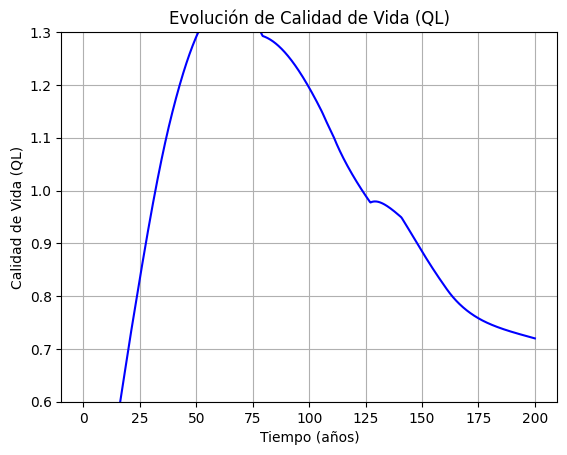

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyworld2 import World2

class World2Model:
    def __init__(self, nr_factor, pols_factor, ciaf_factor, fn_factor, brn_factor,
                 year_min=0, year_max=200, dt=0.2):
        """
        Inicializa el modelo World2 con los parámetros ajustados.

        Parámetros:
        - nr_factor: Factor para la tasa de uso de recursos naturales (NRUN).
        - pols_factor: Factor para la relación de contaminación por persona (POLS).
        - ciaf_factor: Factor para la tasa de inversión de capital (CIAF).
        - fn_factor: Factor para el coeficiente de alimentos (FN).
        - brn_factor: Factor para la tasa normal de nacimientos (BRN).
        - year_min, year_max: Años de inicio y fin de la simulación.
        - dt: Paso temporal.
        """
        self.nr_factor = nr_factor
        self.pols_factor = pols_factor
        self.ciaf_factor = ciaf_factor
        self.fn_factor = fn_factor
        self.brn_factor = brn_factor
        self.year_min = year_min
        self.year_max = year_max
        self.dt = dt
        self.model = None
        self.time = None

    def setup_model(self):
        """Configura el modelo World2 con los parámetros iniciales."""
        model = World2(year_min=self.year_min, year_max=self.year_max, dt=self.dt)

        # Configurar variables de estado
        model.set_state_variables(
            fn=self.fn_factor,            # Coeficiente de alimentos
            pols=self.pols_factor * 3.6e9  # Contaminación por persona
        )

        # Configurar estado inicial
        model.set_initial_state(
            nri=self.nr_factor * 900e9,    # Tasa de uso de recursos naturales
            ciafi=self.ciaf_factor,       # Tasa de inversión de capital
            pi=1.65e9,                    # Población inicial
            poli=self.pols_factor * 0.2e9,  # Contaminación inicial
            cii=self.ciaf_factor * 0.4e9  # Inversión de capital inicial
        )

        # Configurar funciones y simulación
        model.set_table_functions()
        model.set_switch_functions()
        model.brn.value_before_switch = self.brn_factor
        self.model = model

    def simulate(self):
        """Ejecuta la simulación del modelo y almacena resultados."""
        if self.model is None:
            self.setup_model()
        self.model.run()
        self.time = self.model.time
        return {
            "Población (P)": self.model.p,
            "Relación de contaminación (POLR)": self.model.polr,
            "Inversión de capital (CI)": self.model.ci,
            "Calidad de vida (QL)": self.model.ql,
            "Recursos naturales (NR)": self.model.nr
        }

    def plot_simulation(self, variable, label, color, ylim=None):
        if self.time is None or self.model is None:
            raise ValueError("El modelo no se ha ejecutado. Llama a `simulate` primero.")
        plt.plot(self.time, getattr(self.model, variable), label=label, color=color)
        plt.xlabel('Tiempo (años)')
        plt.ylabel(label)
        plt.title(f'Evolución de {label}')
        if ylim:
            plt.ylim(ylim)
        plt.grid(True)
        plt.show()


# Ejemplo de uso
params = [1.0, 1.0, 0.05, 1.25, 0.04]  # Valores iniciales
world2_instance = World2Model(*params)

# Configurar y ejecutar el modelo
results = world2_instance.simulate()

# Imprimir resultados finales de las variables clave
print("Resultados Finales:")
for key, values in results.items():
    print(f"{key}: {values[-1]:.2e}")

# Graficar calidad de vida (QL) con límites ajustados
world2_instance.plot_simulation("ql", "Calidad de Vida (QL)", "blue", ylim=(0.6, 1.3))


Resultados Finales:
Población (P): 3.00e+08
Relación de contaminación (POLR): 2.59e+00
Inversión de capital (CI): 1.75e+09
Calidad de vida (QL): 1.27e+01
Recursos naturales (NR): 6.54e+11


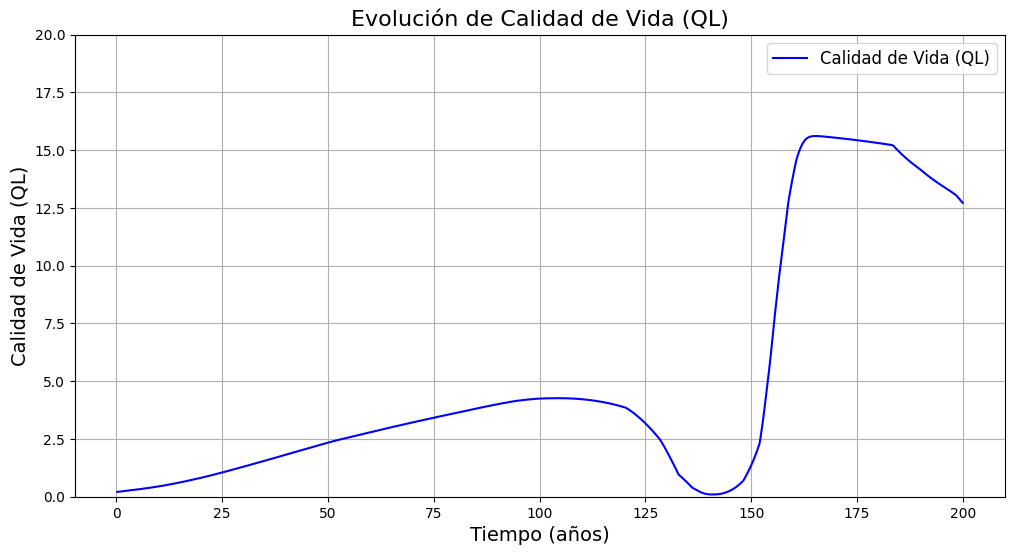

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyworld2 import World2

# Clase para configurar y ejecutar el modelo World2
class World2Model:
    def __init__(self, nr_factor, pols_factor, ciaf_factor, fn_factor, brn_factor,
                 year_min=0, year_max=200, dt=0.2):
        self.nr_factor = nr_factor
        self.pols_factor = pols_factor
        self.ciaf_factor = ciaf_factor
        self.fn_factor = fn_factor
        self.brn_factor = brn_factor
        self.year_min = year_min
        self.year_max = year_max
        self.dt = dt
        self.model = None
        self.time = None

    def setup_model(self):
        model = World2(year_min=self.year_min, year_max=self.year_max, dt=self.dt)
        model.set_state_variables(
            fn=self.fn_factor,
            pols=self.pols_factor * 3.6e9
        )
        model.set_initial_state(
            nri=self.nr_factor * 900e9,
            ciafi=self.ciaf_factor,
            pi=1.65e9,
            poli=self.pols_factor * 0.2e9,
            cii=self.ciaf_factor * 0.4e9
        )
        model.set_table_functions()
        model.set_switch_functions()
        model.brn.value_before_switch = self.brn_factor
        self.model = model

    def simulate(self):
        if self.model is None:
            self.setup_model()
        self.model.run()
        self.time = self.model.time
        return {
            "Población (P)": self.model.p,
            "Relación de contaminación (POLR)": self.model.polr,
            "Inversión de capital (CI)": self.model.ci,
            "Calidad de vida (QL)": self.model.ql,
            "Recursos naturales (NR)": self.model.nr
        }

    def plot_simulation(self, variable, label, color, ylim=None):
        if self.time is None or self.model is None:
            raise ValueError("El modelo no se ha ejecutado. Llama a `simulate` primero.")
        plt.figure(figsize=(12, 6))
        plt.plot(self.time, getattr(self.model, variable), label=label, color=color)
        plt.xlabel('Tiempo (años)', fontsize=14)
        plt.ylabel(label, fontsize=14)
        plt.title(f'Evolución de {label}', fontsize=16)
        if ylim:
            plt.ylim(ylim)
        plt.grid(True)
        plt.legend(fontsize=12)
        plt.show()


# Valores iniciales para el modelo
params = [0.94591, 0.27007, 0.01000, 1.25000, 0.02045]  # [NRUN, POLS, CIAF, FN, BRN]
world2_instance = World2Model(*params)

# Ejecutar el modelo
results = world2_instance.simulate()

# Imprimir resultados finales
print("Resultados Finales:")
for key, values in results.items():
    print(f"{key}: {values[-1]:.2e}")

# Graficar calidad de vida (QL) con un tamaño más grande y eje Y ajustado hasta 2.0
world2_instance.plot_simulation("ql", "Calidad de Vida (QL)", "blue", ylim=(0.0, 20))


In [ ]:
import numpy as np
from scipy.optimize import minimize
from pyworld2 import World2

simulation_count = 0

# Función para simular el modelo World2 con parámetros dados
def simulate_world2(params, year_min, year_max, dt):
    global simulation_count
    simulation_count += 1  # Contador de simulaciones
    model = World2(year_min=year_min, year_max=year_max, dt=dt)

    # Configuración del modelo con los parámetros ajustados
    model.set_state_variables(
        fn=params[3],             # Coeficiente de alimentos
        pols=params[1] * 3.6e9    # Contaminación por persona
    )
    model.set_initial_state(
        nri=params[0] * 900e9,    # Tasa de uso de recursos naturales
        ciafi=params[2],          # Tasa de inversión de capital
        pi=1.65e9,                # Población inicial
        poli=params[1] * 0.2e9,   # Contaminación inicial
        cii=params[2] * 0.4e9     # Inversión de capital inicial
    )
    model.set_table_functions()
    model.set_switch_functions()
    model.brn.value_before_switch = params[4]  # Tasa normal de nacimientos
    model.run()

    # Retornar el valor final de la calidad de vida (QL)
    return model.ql[-1]  # La calidad de vida final

# Función objetivo para maximizar la calidad de vida (QL)
def objective(params, year_min, year_max, dt):
    return -simulate_world2(params, year_min, year_max, dt)  # Negativo porque buscamos maximizar

# Configuración inicial para la optimización
parametros_iniciales = [0.25, 0.5, 0.03, 0.8, 0.04]  # [NRUN1970, POLS, CIAF, FN, BRN]
limites_parametros = [
    (0.1, 1.0),   # NRUN1970
    (0.1, 1.0),   # Pollutionpercap1970
    (0.01, 0.05), # Capinvrate1970
    (0.6, 1.25),  # Foodcoeff1970
    (0.02, 0.04)  # Birthratenormal1970
]

# Parámetros de simulación
year_min, year_max = 1900, 2100
dt = 0.2  # Paso temporal

# Optimización
result = minimize(
    objective,
    parametros_iniciales,
    args=(year_min, year_max, dt),
    bounds=limites_parametros
)

# Resultados de los parámetros óptimos
optimal_params = result.x
print("Parámetros Óptimos:")
print(f"NRUN1970: {optimal_params[0]:.5f}")
print(f"Pollutionpercap1970: {optimal_params[1]:.5f}")
print(f"Capinvrate1970: {optimal_params[2]:.5f}")
print(f"Foodcoeff1970: {optimal_params[3]:.5f}")
print(f"Birthratenormal1970: {optimal_params[4]:.5f}")
print("\nCalidad de Vida Máxima (QL):")
print(f"{-result.fun:.5f}")

# Información del optimizador
print("\nInformación del Optimizador:")
print(result)

# Contador de simulaciones
print("\nNúmero de simulaciones realizadas:")
print(simulation_count)

Parámetros Óptimos:
NRUN1970: 0.94591
Pollutionpercap1970: 0.27007
Capinvrate1970: 0.01000
Foodcoeff1970: 1.25000
Birthratenormal1970: 0.02045

Calidad de Vida Máxima (QL):
14.01464

Información del Optimizador:
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -14.014640922847155
        x: [ 9.459e-01  2.701e-01  1.000e-02  1.250e+00  2.045e-02]
      nit: 13
      jac: [ 1.123e+00 -2.091e+01  3.869e+01 -1.188e+01  7.656e+01]
     nfev: 384
     njev: 64
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>

Número de simulaciones realizadas:
384


In [ ]:
params2 = [0.03, 2, 0.73, 0.05, 0.83]

In [ ]:
simulate_world2(params2, 1900, 2100, 0.2)

0.17739459796694496